In [51]:
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


FILE = 'SMS_LLMextracted_70_papers.csv'
df = pd.read_csv(FILE)
df['MOFs_extracted'] = [literal_eval(d) for d in df['MOFs_extracted']]
df

,Unnamed: 0,doi,ids,n_MOFs,MOFs_reported,n_mofs,MOFs_extracted,reported,Category
0,0,10.1039/c2jm15604k,[0],1,"{'MOF1': {'metal': 'Zn', 'linker': '(1R,3S)-1,...",1,"{'MOF1': {'name': 'MOF1', 'metal_node': 'Zn2+'...",10.1039/c2jm15604k,chiralty
1,1,10.1016/j.inoche.2007.01.001,[1],1,"{'MOF1': {'metal': 'Cd', 'linker': '(1R, 3S)-1...",1,{'MOF1': {'name': '[Cd(3-MPCA)2 Æ H2O] Æ 5.5H2...,10.1016/j.inoche.2007.01.001,chiralty
2,2,10.1021/cg101135r,"[2, 3]",2,"{'MOF1': {'metal': 'Zn', 'linker': '1,2,2-trim...",2,"{'MOF1': {'name': 'ZnL2(H2O)2', 'metal_node': ...",10.1021/cg101135r,chiralty
3,3,10.1021/ic502861k,[4],1,"{'MOF1': {'metal': 'Mn', 'linker': '(1R,3S)-1,...",1,{'MOF1': {'name': '(Me2NH2)2[Mn4O(D-cam)4]*(H2...,10.1021/ic502861k,chiralty
4,4,10.1016/j.micromeso.2008.06.040,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...",14,"{'MOF1': {'metal': 'Zn', 'linker': 'benzene-1,...",14,"{'MOF1': {'name': 'MOF-5', 'metal_node': 'Zinc...",10.1016/j.micromeso.2008.06.040,optimization
...,...,...,...,...,...,...,...,...,...
65,65,10.1039/c7ra08433a,[478],1,"{'MOF1': {'metal': 'Zn', 'linker': '(S)-5-(1-c...",1,"{'MOF1': {'name': '1-R', 'metal_node': 'Zinc',...",10.1039/c7ra08433a,chiralty
66,66,10.1039/c7ra00337d,"[479, 480]",2,"{'MOF1': {'metal': 'Zn', 'linker': ""(S)-4'-(1-...",2,"{'MOF1': {'name': '[Zn((R)-cbca)]$H2O', 'metal...",10.1039/c7ra00337d,chiralty
67,67,10.1039/c9nj05766h,[481],1,"{'MOF1': {'metal': 'Co', 'linker': ""4'-(1-carb...",1,{'MOF1': {'name': '[Co2(OH)(H2O)2(cbca)2H2O]n ...,10.1039/c9nj05766h,chiralty
68,68,10.1021/cg049781w,[482],1,"{'MOF1': {'metal': 'Cu', 'linker': ""N,N'-bis(4...",1,"{'MOF1': {'name': '[Cu(BCDC)]PF6*THF', 'metal_...",10.1021/cg049781w,chiralty


In [52]:
df['n_mofs_extracted'] = None
for i, row in df.iterrows():
    n_extracted = len(row['MOFs_extracted'].values())
    df.at[i, 'n_mofs_extracted'] = n_extracted


chiralty
Correct amount of described MOFs extracted by LLM: 53.84615384615385 %
optimization
Correct amount of described MOFs extracted by LLM: 25.0 %
review
Correct amount of described MOFs extracted by LLM: 0.0 %


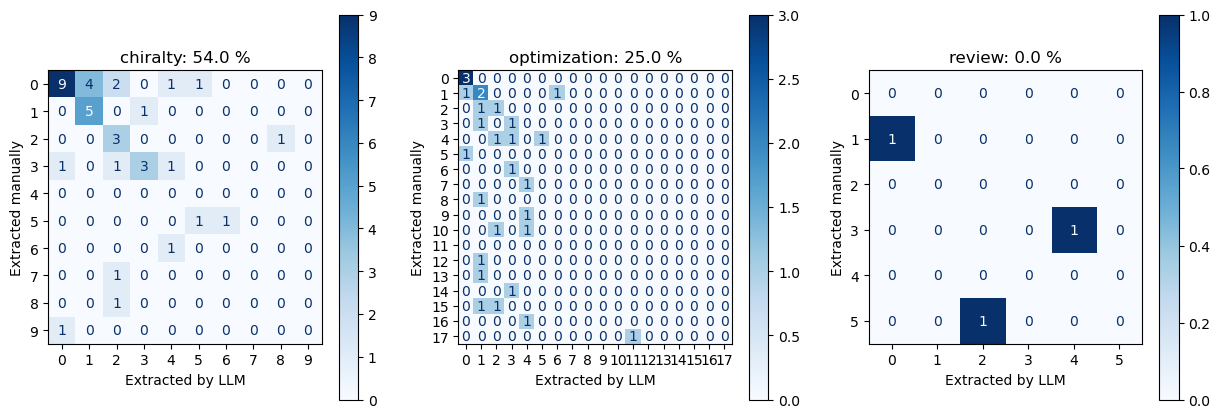

In [53]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs = axs.flatten()

for i, (category, df_category) in enumerate(df.groupby('Category')):
    print(category)

    true_n_mofs = df_category['n_mofs'].tolist()
    extracted_n_mofs = df_category['n_mofs_extracted'].tolist()

    correct = [t==e for t, e in zip(true_n_mofs, extracted_n_mofs)]
    acc = correct.count(True)/len(correct)
    print(f'Correct amount of described MOFs extracted by LLM: {100*acc} %')
    cm = confusion_matrix(true_n_mofs, extracted_n_mofs)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, ax = axs[i])
    axs[i].set_title(f'{category}: {100*round(acc, 2)} %')

    axs[i].set_xlabel('Extracted by LLM')
    axs[i].set_ylabel('Extracted manually')


plt.show()